# <center>Metody Numeryczne</center>

# Laboratorium 5: Równania liniowe MxN


**Wykonał:** \<Faustyna Kowalczyk>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, w szczególności z wykorzystaniem rzadkich macierzy prostokątnych.

Dana jest prostokątna macierz $\mathbf{A}$ o wymiarach $m \times n$ oraz wektor kolumnowy $\mathbf{b}$ o wymiarach $m \times 1$. Należy rozwiązać układ równań postaci:
 
$$
\mathbf{Ax}=\mathbf{b}
$$
  
gdzie:
- $\mathbf{A}$ - macierz współczynników z lewej strony równania, 
- $\mathbf{x}$ - wektor zmiennych,
- $\mathbf{b}$ - wektor wyników prawej strony równania.  

Do oceny jakości rozwiązania wykorzystywać będziemy residuum (ang. *residual*):

$$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$$


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- Do wykonania analizy zużycia pamięci potrzebna jest biblioteka [*memory_profiler*](https://pypi.org/project/memory-profiler/), która do poprawnego działania wymaga doinstalowania pakietu [*setuptools*](https://pypi.org/project/setuptools/). Po instalacji bibliotek może wystąpić błąd związany z brakiem modułu *distutils*. Należy go zignorować i przeładować okno VSCode (lub zrestartować kernela).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [55]:
# !python -m pip install numpy scipy matplotlib memory_profiler setuptools

import main
from scipy.linalg import solve_triangular
import scipy.linalg as sp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import numpy.linalg as nplin

%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


---

### **Zadanie 1.**

Zdefiniuj funkcję *`spare_matrix_Abt()`* generującą wektor $m$-wymiarowy $\mathbf{t}$, którego wartości należą do przedziału $[0,1]$ (za pomocą funkcji [`np.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)). Na podstawie tego wektora funkcja powinna zwracać:
- $\mathbf{b}$ - wektor $m$-wymiarowy, którego wartości dane są funkcją $\cos(4t)$,
- $\mathbf{A}$ - macierz postaci: 

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
$$  

> **Wskazówka:** Do definicji macierzy $\mathbf{A}$ można użyć funkcji [`np.vander()`](https://numpy.org/doc/stable/reference/generated/numpy.vander.html) z odpowiednio dobranymi parametrami.

---

In [56]:
m = 50
n = 10  
A, b = main.spare_matrix_Abt(m, n)
print("Macierz A:")
print(A)
print("\nWektor b:")
print(b)
print("\nWymiary:")
print("A.shape =", A.shape)
print("b.shape =", b.shape)



Macierz A:
[ 1.          0.9966699   0.9867018   0.97016207  0.94716088  0.91785141
  0.88242889  0.84112921  0.79422746  0.742036    0.68490244  0.6232073
  0.55736148  0.48780353  0.41499671  0.33942593  0.26159452  0.18202083
  0.10123485  0.01977463 -0.0618173  -0.14299751 -0.22322532 -0.30196642
 -0.37869636 -0.45290412 -0.52409544 -0.59179619 -0.65555547 -0.71494862
 -0.76958007 -0.81908598 -0.86313662 -0.9014386  -0.93373683 -0.9598162
 -0.97950301 -0.99266614 -0.99921793 -0.99911473 -0.99235724 -0.97899047
 -0.95910343 -0.93282858 -0.90034091 -0.8618568  -0.81763256 -0.76796273
 -0.71317813 -0.65364362]

Wektor b:
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 2.04081633e-02 4.16493128e-04 8.49985975e-06
  1.73466526e-07 3.54013317e-09 7.22476158e-11 1.47444114e-12
  3.00906355e-14 6.14094602e-16]
 [1.00000000e+00 4.08163265e-02 1.66597251e-03 6.7998878

### **Zadanie 2.**

Korzystając z funkcji zaimplementowanej w **Zadaniu 1.**, oraz mając dane $m = 50$ i $n = 12$, rozwiąż układ równań $\mathbf{Ax}=\mathbf{b}$ postaci:

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
\left[
\begin{matrix}
    x_0    \\
    x_1    \\
    x_2    \\
    \vdots \\
    x_{n-1}
\end{matrix}
\right]
=
\left[
\begin{matrix}
    b_0    \\
    b_1    \\
    b_2    \\
    \vdots \\
    b_{m-1}
\end{matrix}
\right]
$$

za pomocą następujacych metod:

1. Przekształcenia układu równań do postaci $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$ i stosując funkcję [`np.linalg.solve()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html). Aby wyznaczyć $\mathbf{A}^{\mathrm{T}}\mathbf{A}$ oraz $\mathbf{A}^{\mathrm{T}}\mathbf{b}$ zaimplementuj funkcję *`square_from_rectan()`*.

2. Użycia dedykowanej metody z biblioteki numpy do rozwiązywania problemu najmniejszych kwadratów&mdash;funkcji [`np.linalg.lstsq()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html).  

3. Rozkładu QR podanego na wykładzie i wyznaczenia rozwiązania dla układu równań z macierzą trójkątną. Użyć należy funkcji [`np.linalg.qr()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html) i [`sp.linalg.solve_triangular()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html).

4. Rozkładu SVD podanego na wykładzie. Użyć należy funkcji [`np.linalg.svd()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html).

Po zaimplementowaniu powyższych metod przeprowadź profilowanie kodu w celu analizy czasu wykonania oraz zużycia pamięci każdej z nich. Porównaj jakość otrzymanych wyników.

In [ ]:
matrix, vector = main.spare_matrix_Abt(50, 12)
def solve_normal_eq(m, v):
    v = np.asarray(v).ravel()

    result = main.square_from_rectan(m, v)
    if result is None:
        return None

    A_sq, b_sq = result
    return np.linalg.solve(A_sq, b_sq)



x1 = solve_normal_eq(matrix, vector)
if x1 is not None:
    residuum_x1 = main.residual_norm(matrix, x1, vector)
    print("Norma residuum (normal eq):", residuum_x1)

saved_timing1 = %timeit -r 10 -n 100 -o solve_normal_eq(matrix, vector)
saved_mem1 = %memit -o solve_normal_eq(matrix, vector)
def lstsq(m, v):
    m = np.asarray(m)
    v = np.asarray(v).ravel()

    if m.ndim == 1:
        m = m.reshape(-1, 1)
    if v.shape[0] != m.shape[0]:
        v = v[:m.shape[0]]

    res, *_ = np.linalg.lstsq(m, v, rcond=None)
    return res


x2 = lstsq(matrix, vector)
residuum_x2 = main.residual_norm(matrix, x2, vector)
print("Norma residuum (lstsq):", residuum_x2)

saved_timing2 = %timeit -r 10 -n 100 -o lstsq(matrix, vector)
saved_mem2 = %memit -o lstsq(matrix, vector)
def qr(m, v):
    m = np.asarray(m)
    v = np.asarray(v).ravel()
    if m.ndim == 1:
        m = m.reshape(-1, 1)
    if v.shape[0] != m.shape[0]:
        v = v[:m.shape[0]]

    Q, R = np.linalg.qr(m, mode='reduced')
    return sp.linalg.solve_triangular(R, Q.T @ v)


x3 = qr(matrix, vector)
residuum_x3 = main.residual_norm(matrix, x3, vector)
print("Norma residuum (QR):", residuum_x3)

saved_timing3 = %timeit -r 10 -n 100 -o qr(matrix, vector)
saved_mem3 = %memit -o qr(matrix, vector)
def svd(m, v):
    m = np.asarray(m)
    v = np.asarray(v).ravel()
    if m.ndim == 1:
        m = m.reshape(-1, 1)
    if v.shape[0] != m.shape[0]:
        v = v[:m.shape[0]]

    U, S, Vt = np.linalg.svd(m, full_matrices=False)
    return Vt.T @ (U.T @ v / S)

x4 = svd(matrix, vector)
residuum_x4 = main.residual_norm(matrix, x4, vector)
print("Norma residuum (SVD):", residuum_x4)

saved_timing4 = %timeit -r 10 -n 100 -o svd(matrix, vector)
saved_mem4 = %memit -o svd(matrix, vector)

1.66 μs ± 286 ns per loop (mean ± std. dev. of 10 runs, 100 loops each)
peak memory: 156.99 MiB, increment: 0.00 MiB
Norma residuum (lstsq): None
72 μs ± 7.69 μs per loop (mean ± std. dev. of 10 runs, 100 loops each)
peak memory: 157.00 MiB, increment: 0.00 MiB
Norma residuum (QR): None
214 μs ± 14.9 μs per loop (mean ± std. dev. of 10 runs, 100 loops each)
peak memory: 157.00 MiB, increment: 0.00 MiB
Norma residuum (SVD): None
71.7 μs ± 8 μs per loop (mean ± std. dev. of 10 runs, 100 loops each)
peak memory: 157.02 MiB, increment: 0.00 MiB


---

### **Zadanie 3.**

Dane są wydatki ($\mathbf{w}$) oraz dochody ($\mathbf{d}$) dla pewnego gospodarstwa:

$$
\begin{align*}
    \mathbf{w} &= (140, 190, 250, 270, 290, 310, 340, 360, 420, 390)\\
    \mathbf{d} &= (210, 270, 290, 310, 370, 400, 450, 480, 510, 520)
\end{align*}
$$


1. Utwórz regresję liniową zależności wydatków od dochodów.

2. Przeanalizuj jaki jest błąd uzyskanej prostej względem danych. Czy istnieje możliwość uzyskania lepszego wyniku?

> **Wskazówka:** W celu wyznaczenia współczynników wykorzystaj niniejszą informację nt. regresji liniowej [[link](https://en.wikipedia.org/wiki/Simple_linear_regression#Formulation_and_computation)].


Współczynniki wyliczone za pomocą macierzy rzadkiej: a = [23.08251017], b = [1.20918071]
Współczynniki wyliczone za pomocą funkcji polyval: a = 23.08251016850668, b = 1.20918070889018


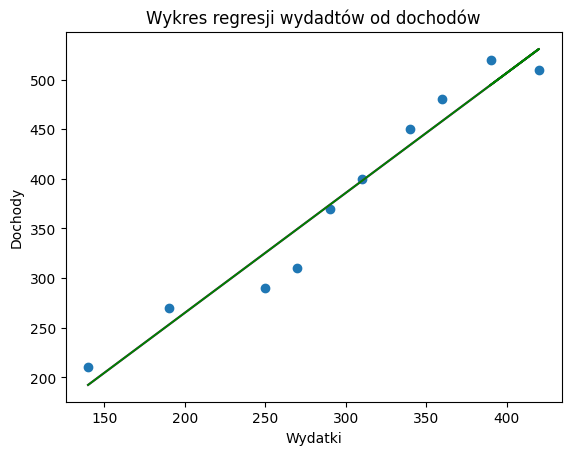

In [58]:
# Dane do Zadania 3.
w = np.array([140, 190, 250, 270, 290, 310, 340, 360, 420, 390])
d = np.array([210, 270, 290, 310, 370, 400, 450, 480, 510, 520])

a = np.polyfit(w, d, 1)

d = d.reshape(10, 1)
w = w.reshape(10, 1)
one = np.ones((10, 1))

w_m = np.concatenate((one, w), axis=1)
Q, R = np.linalg.qr(w_m)
z = sp.linalg.solve_triangular(R, Q.T @ d)

y_a = z[0] + z[1] * w
y_b = a[0] * w + a[1]

fig1, ax = plt.subplots()
ax.scatter(w, d)
ax.plot(w, y_a, 'm')
ax.plot(w, y_b, 'g')
ax.set_title('Wykres regresji wydadtów od dochodów')
ax.set(xlabel='Wydatki', ylabel='Dochody')

print(f'Współczynniki wyliczone za pomocą macierzy rzadkiej: a = {z[0]}, b = {z[1]}')
print(f'Współczynniki wyliczone za pomocą funkcji polyval: a = {a[1]}, b = {a[0]}')

---

### **Zadanie 4.**

W rzeczywistych problemach często dokładna postać analityczna analizowanego procesu nie jest znana, a dostępne są jedynie jego dane wejściowe i wyjściowe. W tym zadaniu przeprowadzona zostanie symulacja takiego scenariusza oraz opisany zostanie problem poszukiwania modelu analitycznego jak najdokładniej odzwierciedlającego analizowany proces.

<br>

**Punkt 1. Symulacja danych pomiarowych.**

Zdefiniowany jest rzeczywisty proces opisany następującą zależnością:

$$
y = 2 + x_1 - 0.5x_2 + \epsilon
$$

gdzie:
- $y$ - dane wyjściowe procesu,
- $x_1$, $x_2$ - mierzalne zmienne niezależne, które wpływają na proces,
- $\epsilon$ - zakłócenie procesu.

Należy przygotować dane procesu, które posłużą w Punkcie 2. do jego modelowania.

1. Przy użyciu funkcji [`np.random.normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) wygeneruj wektory kolumnowe danych wejściowych procesu ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz wektor zakłóceń ($\mathbf{\epsilon}$) o wymiarze $(100,1)$. Każdy z nich powinien charakteryzować się średnią równą $0$ oraz odchyleniem standardowym równym $1$.

2. Oblicz wartości wektora $\mathbf{y}$ (dane wyjściowe procesu), korzystając z podanego wzoru opisującego proces oraz wektorów zdefiniowanych w poprzednim podpunkcie.

<br>

**Punkt 2. Modelowanie procesu.**


W Punkcie 1. opisany został rzeczywisty proces, na podstawie którego przygotowane zostały dane do analizy. W tym punkcie natomiast przyjmuje się założenie, że dokładne równanie procesu ($y = ...$) oraz wektor szumów ($\mathbf{\epsilon}$) nie są znane. Danymi, na których przeprowadzone będzie modelowanie, są jedynie wektory danych wejściowych ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz danych wyjściowych ($\mathbf{y}$).

Wszystkie modele używane w ramach tego zadania będą postaci:

$$
\hat{y} \sim a + z_1 + z_2 + ... + z_n
$$

gdzie:
- $\hat{y}$ - przybliżenie modelowanego procesu,
- $a$ - wyraz wolny,
- $z_1 + z_2 + ... + z_n$ - zmienne niezależne, których ilość dobiera się na podstawie dostępnych danych, tak aby otrzymać jak najlepszy model.

Celem zadania jest wyznaczenie wektora współczynników [regresji liniowej](https://en.wikipedia.org/wiki/Linear_regression) $\mathbf{b}$, co sprowadza się do rozwiązania równania:

$$
\mathbf{y} = b_0 \cdot \mathbf{1} + b_1 \mathbf{z}_1 + b_2 \mathbf{z}_2 + ... + b_n \mathbf{z}_{n}
$$

które w postaci macierzowej przybiera postać:

$$
\mathbf{Z} \mathbf{b} = \mathbf{y}
$$

gdzie:
- $\mathbf{Z}$ - macierz rzeczywistych danych wejściowych do procesu,
- $\mathbf{b}$ - wektor współczynników regresji liniowej do wyliczenia,
- $\mathbf{y}$ - wektor rzeczywistych danych wyjściowych z procesu.

<br>

W ramach zadania przeanalizowane i porównane zostaną poniższe modele:
1. $\hat{y} \sim a + x_1$   
2. $\hat{y} \sim a + x_2$
3. $\hat{y} \sim a + x_1 + x_2$
4. $\hat{y} \sim a + x_1 + x_2 + x_1x_2$

Dla każdego z modeli zdefiniowanych powyżej:

1. Rozpisz analitycznie równanie opisujące model, analogicznie jak w opisie powyżej (np. $\mathbf{y} = b_0 \cdot \mathbf{1} + ... $). Opisz co oznaczają poszczególne elementy wzoru. 

2. Przedstaw otrzymane równanie w formie macierzowej i zdefiniuj $\mathbf{Z}$, $\mathbf{b}$ oraz $\mathbf{y}$. Podaj wymiary każdego z nich oraz napisz z czego wynikają.

3. Wyznacz wektor współczynników regresji liniowej ($\mathbf{b}$) wykorzystując rozkład QR.

4. Przedstaw na wykresie rzeczywiste wartości wyjściowe procesu ($\mathbf{y}$) oraz wyznaczoną funkcję regresji (pomiń ten podpunkt dla ostatniego modelu).


Po przeprowadzeniu analizy dla wszystkich modeli przeanalizuj znanymi metrykami otrzymane wyniki i je opisz.


> **Wskazówka:** Macierz $\mathbf{Z}$ składa się z konkatenacji wektorów kolumnowych zmiennych niezależnych oraz wektora kolumnowego wypełnionego jedynkami, odpowiadającego wyrazowi wolnemu w modelu ($\mathbf{Z} = [\mathbf{1}, \mathbf{z}_1, ... , \mathbf{z}_n]$). Do utworzenia takiej macierzy można posłużyć się funkcją [`np.concatenate()`](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html).
>
> Płaszczyznę regresji dla trzeciego modelu można wyrysować stosując [`np.meshgrid()`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) oraz [`plot_wireframe()`](https://matplotlib.org/stable/plot_types/3D/wire3d_simple.html).
>
> Rozkład QR w skrócie: dane jest równanie: $\mathbf{A}\mathbf{x} = \mathbf{b}$. Jeżeli zdefiniujemy dodatkowo $\mathbf{A} = \mathbf{Q} \mathbf{R}$ to zachodzi: $\mathbf{R}\mathbf{x} = \mathbf{Q}^T\mathbf{b}$.

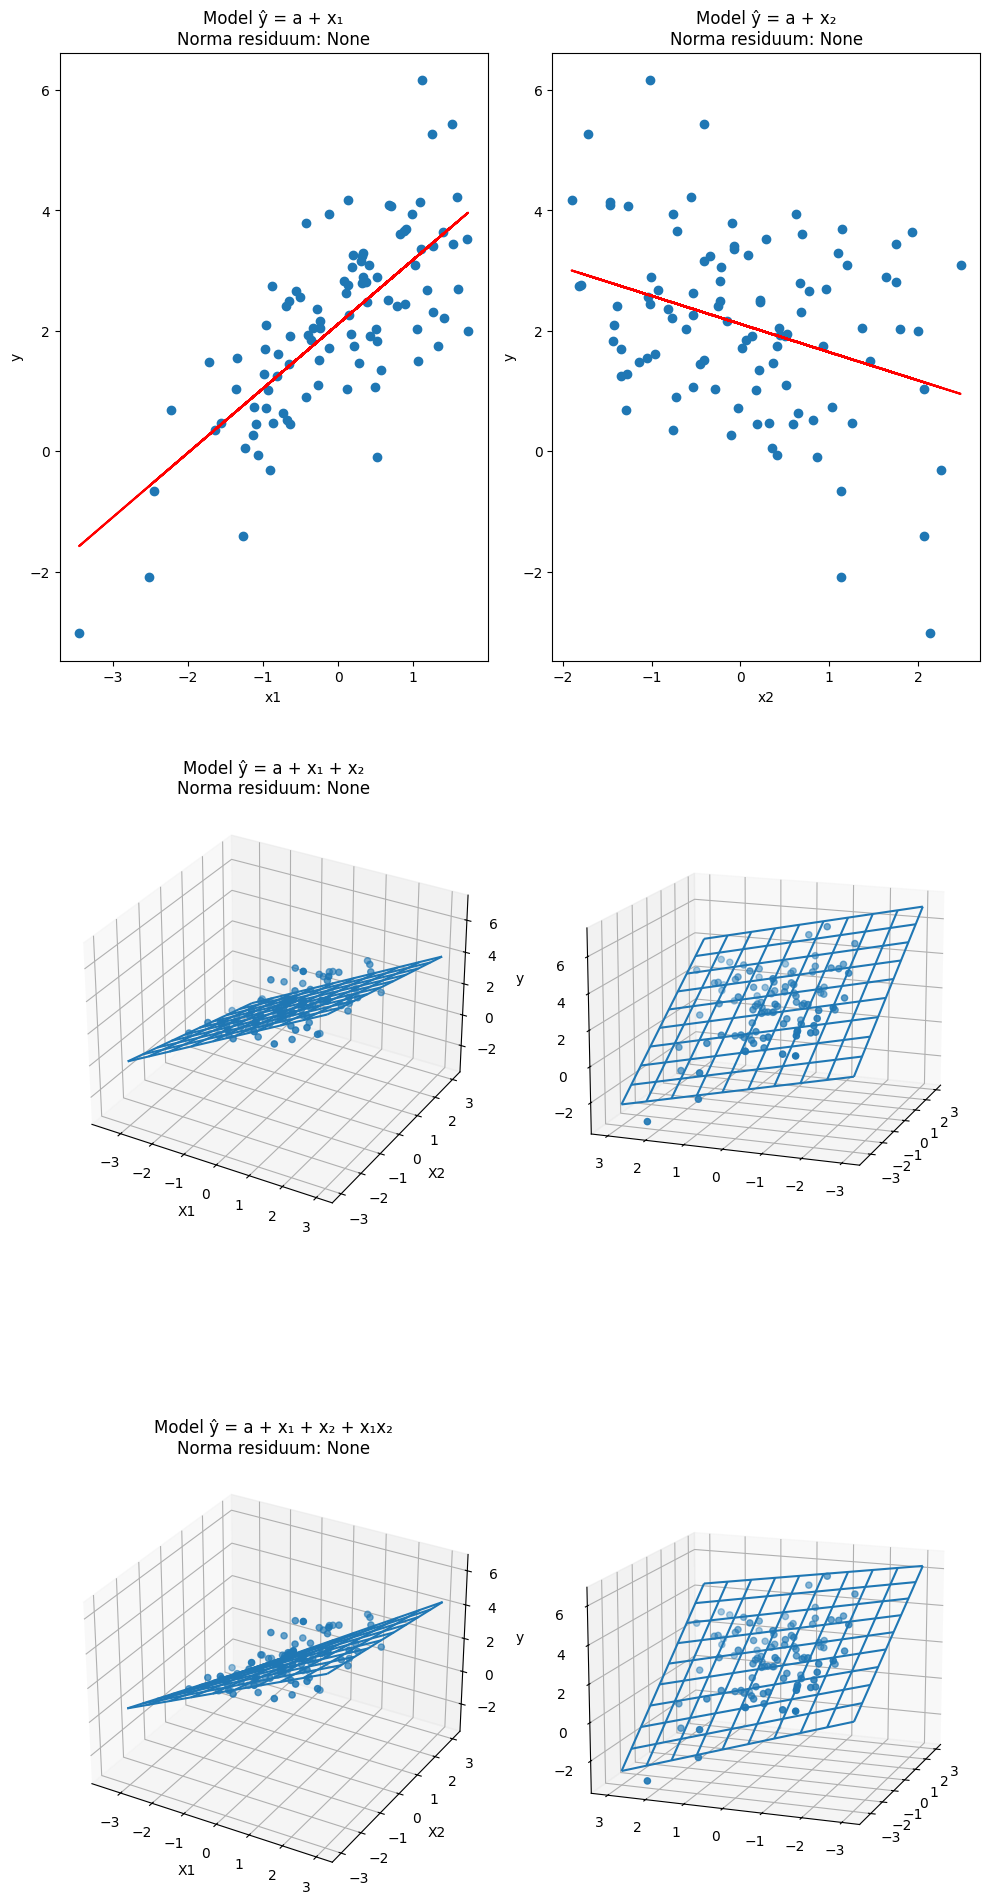

In [ ]:
# ===== Twoja implementacja tutaj =====
from scipy.linalg import solve_triangular

N = 100
x1 = np.random.normal(0, 1, (N, 1))
x2 = np.random.normal(0, 1, (N, 1))
eps = np.random.normal(0, 1, (N, 1))

const = np.ones((N, 1))

A1 = np.hstack((const, x1))
A2 = np.hstack((const, x2))
A3 = np.hstack((const, x1, x2))
A4 = np.hstack((const, x1, x2, x1 * x2))


y = 2 + x1 - 0.5 * x2 + eps

fig = plt.figure(figsize=(10, 20))
axes = [
    fig.add_subplot(3, 2, 1),
    fig.add_subplot(3, 2, 2),
    fig.add_subplot(3, 2, 3, projection='3d'),
    fig.add_subplot(3, 2, 4, projection='3d'),
    fig.add_subplot(3, 2, 5, projection='3d'),
    fig.add_subplot(3, 2, 6, projection='3d')
]

def solve_qr(A, y):
    Q, R = np.linalg.qr(A)
    return solve_triangular(R, Q.T @ y).ravel()

coef1 = solve_qr(A1, y)
y_hat1 = coef1[0] + coef1[1] * x1
res1 = main.residual_norm(A1, coef1, y)

axes[0].scatter(x1, y)
axes[0].plot(x1, y_hat1, 'r')
axes[0].set(title=f'Model ŷ = a + x₁\nNorma residuum: {res1}',
            xlabel='x1', ylabel='y')

coef2 = solve_qr(A2, y)
y_hat2 = coef2[0] + coef2[1] * x2
res2 = main.residual_norm(A2, coef2, y)

axes[1].scatter(x2, y)
axes[1].plot(x2, y_hat2, 'r')
axes[1].set(title=f'Model ŷ = a + x₂\nNorma residuum: {res2}',
            xlabel='x2', ylabel='y')
gx, gy = np.meshgrid(np.linspace(-3, 3, 10), np.linspace(-3, 3, 10))
coef3 = solve_qr(A3, y)
z3 = coef3[0] + coef3[1] * gx + coef3[2] * gy
res3 = main.residual_norm(A3, coef3, y)

axes[2].scatter(x1, x2, y)
axes[2].plot_wireframe(gx, gy, z3)
axes[2].set(title=f'Model ŷ = a + x₁ + x₂\nNorma residuum: {res3}',
            xlabel='X1', ylabel='X2', zlabel='y')

axes[3].scatter(x1, x2, y)
axes[3].plot_wireframe(gx, gy, z3)
axes[3].view_init(15, 200)
coef4 = solve_qr(A4, y)
z4 = coef4[0] + coef4[1] * gx + coef4[2] * gy + coef4[3] * gx * gy
res4 = main.residual_norm(A4, coef4, y)

axes[4].scatter(x1, x2, y)
axes[4].plot_wireframe(gx, gy, z4)
axes[4].set(title=f'Model ŷ = a + x₁ + x₂ + x₁x₂\nNorma residuum: {res4}',
            xlabel='X1', ylabel='X2', zlabel='y')

axes[5].scatter(x1, x2, y)
axes[5].plot_wireframe(gx, gy, z4)
axes[5].view_init(15, 200)

plt.tight_layout()
plt.show()


---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)